# Dataset

We will be using two data financial datasets provided by Dr. Nathan Goldman who has access to the original datasets available on the S&P Compustat database. The first dataset, EComp, contains data on how the executives of various companies are compensated. The second dataset, CSTAT, contains financial data of these companies, including balance sheet figures and tax information. This data was collected because publicly traded companies in the US are required by law to disclose financial information about the company and executive compensation. The Compustat database aggregates the financial data from various companies to facilitate analysis. We will use these two datasets to answer our research question of how executive compensation is related to company tax planning.


The unit of observation for this data is the Chief Executive Officer (CEO) for a specific company, identified in each dataset by its unique Global Company Key (gvkey). The original data was somewhat tidy and tame, with many rows missing data for certain columns caused because some companies are not reporting information for all variables. The CSTAT dataset has minimal repeated row entries, likely due to companies refiling financial statements, that will need to be cleaned prior to merging.


Below is the data dictionary describing the data held by each column. Qualitative/categorical data has been italicized.


**EComp Dataset Columns**

*ticker: Ticker Symbol*

*gvkey: Company ID Number*

*co_per_rol: ID number for each executive/company combination*

*pceo: Current CEO*

bonus: Bonus (in thousands of dollars)

opt_exer_val: Value realized on option exercise (in thousands of dollars), calculated as the difference between the exercise price and the market price of the stock on the exercise date

opt_unex_unexer_est_val: Estimated value of in the-money unexercised unexercisable options (in thousands of dollars)

othcomp: All other compensation (in thousands of dollars)

salary: Base salary (in thousands of dollars)

stock_awards: Value of stock-related awards that do not have option-like features (in thousands of dollars)

stock_unvest_val: Restricted stock holdings (in thousands of dollars)

tdc1: Total compensation (Salary + Bonus + Other Annual + Restricted Stock Grants + LTIP Payouts + All Other + Value of Option Grants) (in thousands of dollars)

tdc2: Total compensation (Salary + Bonus + Other Annual + Restricted Stock Grants + LTIP Payouts + All Other + Value of Options Exercised) (in thousands of dollars)

total_sec: Total compensation as reported in SEC Filings (in thousands of dollars)


**CStat Dataset Columns**

*gvkey: Company ID Number (issue, currency, index)*

*tic: Ticker Symbol*

*state: State*

act: Total Current Assets

at: Total Assets

che: Cash and Cash Equivalents

cogs: Cost of Goods Sold

ib: Income before extraordinary items

pi: Pretax Income

revt: Total Revenue

txc: Income Taxes - Current

txdb: Deferred Taxes (Balance Sheet)

txdc: Deferred Taxes

txdi: Deferred Taxes (Income Account)

txt: Total Income Taxes


In [244]:
#import pandas
import pandas as pd
import numpy as np

In [245]:
# Import the MoMA paintings dataset (CSV file
# The file location
ecomploc = "https://raw.githubusercontent.com/causeyca21/CSC442Group/refs/heads/main/EComp_cols_selected_small.csv"
cstatloc = "https://raw.githubusercontent.com/causeyca21/CSC442Group/refs/heads/main/CSTAT_columns_selected_small.csv"
# Read in the file and print out the DataFrame

eComp = pd.read_csv(ecomploc)
cStat = pd.read_csv(cstatloc)

# 1.Data Cleaning

## 1.1 Get to know data

> #### Data description:

The data dictionary:

**EComp Dataset Columns**

- *ticker: Ticker Symbol*

- *gvkey: Company ID Number*

- *co_per_rol: ID number for each executive/company combination*

- *pceo: Current CEO*

- bonus: Bonus (in thousands of dollars)

- opt_exer_val: Value realized on option exercise (in thousands of dollars), calculated as the difference between the exercise price and the market price of the stock on the exercise date

- opt_unex_unexer_est_val: Estimated value of in the-money unexercised unexercisable options (in thousands of dollars)

- othcomp: All other compensation (in thousands of dollars)

- salary: Base salary (in thousands of dollars)

stock_awards: Value of stock-related awards that do not have option-like features (in thousands of dollars)

- stock_unvest_val: Restricted stock holdings (in thousands of dollars)

- tdc1: Total compensation (Salary + Bonus + Other Annual + Restricted Stock Grants + LTIP Payouts + All Other + Value of Option Grants) (in thousands of dollars)

- tdc2: Total compensation (Salary + Bonus + Other Annual + Restricted Stock Grants + LTIP Payouts + All Other + Value of Options Exercised) (in thousands of dollars)

- total_sec: Total compensation as reported in SEC Filings (in thousands of dollars)


**CStat Dataset Columns**

- *gvkey: Company ID Number (issue, currency, index)*

- *tic: Ticker Symbol*

- *state: State*

- act: Total Current Assets

- at: Total Assets

- che: Cash and Cash Equivalents

- cogs: Cost of Goods Sold

- ib: Income before extraordinary items

- pi: Pretax Income

- revt: Total Revenue

- txc: Income Taxes - Current

- txdb: Deferred Taxes (Balance Sheet)

- txdc: Deferred Taxes

- txdi: Deferred Taxes (Income Account)

- txt: Total Income Taxes

In [246]:
# find shape of the data
print("Executive Compensation shape:", eComp.shape)
print("Company Statistics shape:", cStat.shape)

Executive Compensation shape: (9216, 21)
Company Statistics shape: (13275, 21)


In [247]:
# print columns labels
print("Executive Compensation variables: ", eComp.columns.values)
print('\n')
print("Company Statistics variables", cStat.columns.values)

Executive Compensation variables:  ['ticker' 'year' 'gvkey' 'gender' 'co_per_rol' 'pceo' 'pcfo' 'title' 'age'
 'bonus' 'opt_exer_val' 'opt_unex_exer_est_val' 'opt_unex_unexer_est_val'
 'othcomp' 'pension_value_tot' 'salary' 'stock_awards' 'stock_unvest_val'
 'tdc1' 'tdc2' 'total_sec']


Company Statistics variables ['gvkey' 'datadate' 'tic' 'act' 'aedi' 'at' 'capx' 'che' 'cogs' 'ib' 'lct'
 'lt' 'pi' 'revt' 'txach' 'txc' 'txdb' 'txdc' 'txdi' 'txt' 'state']


In [248]:
# check row labels
print("Executive Compensation rows:", eComp.index.values)
print("Company Statistics rows:", cStat.index.values)

Executive Compensation rows: [   0    1    2 ... 9213 9214 9215]
Company Statistics rows: [    0     1     2 ... 13272 13273 13274]


In [249]:


# find the column that is unique to each row (unit of observation)
# HINT: these will have number of unique values equal to the  number of rows in the dataframe
# could be names or IDs

print("Executive Compensation unique gv keys:", len(set(eComp['co_per_rol'])))
print("Executive Compensation unique gv keys:", len(set(cStat['gvkey'])))

Executive Compensation unique gv keys: 9216
Executive Compensation unique gv keys: 12280


In [250]:
# check type of variables
print("Executive Compensation Dataset Types\n")
print(eComp.dtypes)
print('\n')
print("Company Statistics Dataset Types\n")
print(cStat.dtypes)

Executive Compensation Dataset Types

ticker                      object
year                         int64
gvkey                        int64
gender                      object
co_per_rol                   int64
pceo                        object
pcfo                        object
title                       object
age                        float64
bonus                      float64
opt_exer_val               float64
opt_unex_exer_est_val      float64
opt_unex_unexer_est_val    float64
othcomp                    float64
pension_value_tot          float64
salary                     float64
stock_awards               float64
stock_unvest_val           float64
tdc1                       float64
tdc2                       float64
total_sec                  float64
dtype: object


Company Statistics Dataset Types

gvkey         int64
datadate     object
tic          object
act         float64
aedi        float64
at          float64
capx        float64
che         float64
cogs        float

In [251]:
print("Executive Compensation first few rows\n")
print(eComp.head())

print('\n')
print("Company Statistics first few rows\n")
print(cStat.head())


Executive Compensation first few rows

  ticker  year  gvkey  gender  co_per_rol pceo pcfo  \
0    AIR  2023   1004    MALE       51547  CEO  NaN   
1    AIR  2023   1004    MALE       62300  NaN  CFO   
2    AIR  2023   1004    MALE       64605  NaN  NaN   
3    AIR  2023   1004  FEMALE       64606  NaN  NaN   
4    AIR  2023   1004  FEMALE       72668  NaN  NaN   

                                               title   age  bonus  ...  \
0             CEO, President & Chairman of the Board  47.0    0.0  ...   
1                                    Senior VP & CFO  38.0    0.0  ...   
2               Senior VP & Chief Commercial Officer  46.0    0.0  ...   
3  Senior VP, General Counsel, Chief Administrati...  45.0    0.0  ...   
4          Senior VP & Chief Human Resources Officer  48.0    0.0  ...   

   opt_unex_exer_est_val  opt_unex_unexer_est_val  othcomp  pension_value_tot  \
0              10065.889                 1684.328  482.257                0.0   
1               3436.65

## 1.2 Identify which numerical columns and categorical columns

In [252]:
# create a list of the columns that are categorical and those that are integer and those that have string values

import numpy as np
numerical = []
categorical = []
string = []

for column in eComp.columns:
# check if the column contains more than 10 unique values then it is not categorical
  if (len(set(column)) <= 10):
    categorical.append(column)
# second check for numerical values

# otherwise it would be String values

print("Numerical columns: ", numerical)
print("Categorical columns: ", categorical)
print("String columns: ", string)

Numerical columns:  []
Categorical columns:  ['ticker', 'year', 'gvkey', 'gender', 'co_per_rol', 'pceo', 'pcfo', 'title', 'age', 'bonus', 'opt_exer_val', 'othcomp', 'salary', 'stock_awards', 'tdc1', 'tdc2', 'total_sec']
String columns:  []


### 1.2.1. Numerical column consistency



In [253]:
# Age should be an Integer but is currently represented as a Float with .0
eComp['age'] = eComp['age'].astype('Int64')
eComp['age'].unique()

<IntegerArray>
[  47,   38,   46,   45,   48,   67,   59,   57,   53,   44,   58,   51,   50,
   43,   56,   49,   62,   63,   60, <NA>,   79,   52,   54,   65,   69,   61,
   66,   64,   55,   71,   68,   42,   73,   40,   93,   99,   77,   41,   37,
   34,   39,   78,   76,   72,   81,   70,   33,   74,   75,   80,   88,   84,
   32,   31,   36,   83,   91,   85,   82,   90,   86,  101,   35,   92,   94,
   30,   29]
Length: 67, dtype: Int64

## 1.3. Remove unnecssary values

### 1.3.1. Check for duplicate rows, remove them if needed

In [254]:
# check for duplicate rows using the duplicated().sum() functions - returns number of duplicate rows
print(eComp.duplicated().sum())
print(cStat.duplicated().sum())

0
0


### 1.3.2. Removing unnecessary columns

We can reduce the size of our combined dataset by removing columns that are not important for our analyses. Columns can be "dropped" from a DataFrame using the DataFrame method `drop()`.

In [255]:
# Print out the column labels for the full dataset
print(eComp.info())
print(cStat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ticker                   9216 non-null   object 
 1   year                     9216 non-null   int64  
 2   gvkey                    9216 non-null   int64  
 3   gender                   9216 non-null   object 
 4   co_per_rol               9216 non-null   int64  
 5   pceo                     1767 non-null   object 
 6   pcfo                     1754 non-null   object 
 7   title                    9132 non-null   object 
 8   age                      9079 non-null   Int64  
 9   bonus                    9216 non-null   float64
 10  opt_exer_val             9195 non-null   float64
 11  opt_unex_exer_est_val    9195 non-null   float64
 12  opt_unex_unexer_est_val  9195 non-null   float64
 13  othcomp                  9216 non-null   float64
 14  pension_value_tot       

We will not be using any of the external link resources, so we can remove the columns URL, ThumbnailURL.

In [256]:
# Remove specified columns from the dataset using "drop()"
# eComp.drop(columns=["aedi", "txach"], inplace = True)
cStat.drop(columns=["aedi", "txach", "datadate", "lct", "lt"], inplace = True)
eComp.drop(columns=["title", "year", "pcfo", "gender", "age", "opt_unex_exer_est_val", "pension_value_tot"], inplace = True)

# Print out the column labels from the new DataFrame
print(eComp.info())
print(cStat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ticker                   9216 non-null   object 
 1   gvkey                    9216 non-null   int64  
 2   co_per_rol               9216 non-null   int64  
 3   pceo                     1767 non-null   object 
 4   bonus                    9216 non-null   float64
 5   opt_exer_val             9195 non-null   float64
 6   opt_unex_unexer_est_val  9195 non-null   float64
 7   othcomp                  9216 non-null   float64
 8   salary                   9216 non-null   float64
 9   stock_awards             9216 non-null   float64
 10  stock_unvest_val         9195 non-null   float64
 11  tdc1                     9195 non-null   float64
 12  tdc2                     9195 non-null   float64
 13  total_sec                9192 non-null   float64
dtypes: float64(10), int64(2)

## 1.4. Handling missing data



In [257]:
# check which columns have missing data with info()
print(eComp.info())
print(cStat.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ticker                   9216 non-null   object 
 1   gvkey                    9216 non-null   int64  
 2   co_per_rol               9216 non-null   int64  
 3   pceo                     1767 non-null   object 
 4   bonus                    9216 non-null   float64
 5   opt_exer_val             9195 non-null   float64
 6   opt_unex_unexer_est_val  9195 non-null   float64
 7   othcomp                  9216 non-null   float64
 8   salary                   9216 non-null   float64
 9   stock_awards             9216 non-null   float64
 10  stock_unvest_val         9195 non-null   float64
 11  tdc1                     9195 non-null   float64
 12  tdc2                     9195 non-null   float64
 13  total_sec                9192 non-null   float64
dtypes: float64(10), int64(2)

### 1.4.1. Removing rows with missing data

In [258]:
# Identify rows with all NaN values
all_nan_rows = cStat[cStat.isnull().all(axis=1)]
all_nan_rows

# if found remove them
# you can also search for nan values and drop the rows which contain them.
cStat = cStat.drop(index=all_nan_rows.index)

all_nan_rows1 = eComp[eComp.isnull().all(axis=1)]
all_nan_rows1

# if found remove them
# you can also search for nan values and drop the rows which contain them.
eComp = eComp.drop(index=all_nan_rows1.index)

eComp

,ticker,gvkey,co_per_rol,pceo,bonus,opt_exer_val,opt_unex_unexer_est_val,othcomp,salary,stock_awards,stock_unvest_val,tdc1,tdc2,total_sec
0,AIR,1004,51547,CEO,0.0,5799.275,1684.328,482.257,1050.0,3272.152,13379.485,7865.228,12846.484,7865.450
1,AIR,1004,62300,NaN,0.0,453.814,485.493,161.438,494.0,680.302,943.812,2385.017,2668.874,2385.017
2,AIR,1004,64605,NaN,0.0,1350.526,404.053,182.799,494.0,680.302,1450.965,2406.378,3586.947,2406.378
3,AIR,1004,64606,NaN,0.0,783.824,309.341,128.839,450.0,540.163,611.579,2055.031,2703.826,2055.031
4,AIR,1004,72668,NaN,0.0,0.000,35.171,29.627,412.0,580.078,450.787,1825.047,1755.065,1825.047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,ACA,328795,62006,NaN,0.0,0.000,0.000,19.800,515.0,2251.449,3978.014,3251.294,3251.294,3251.294
9212,ACA,328795,62007,NaN,0.0,0.000,0.000,19.800,482.5,653.894,778.634,1460.169,1460.169,1460.169
9213,ACA,328795,62008,NaN,0.0,0.000,0.000,19.800,425.0,575.815,590.050,1487.690,1487.690,1487.690
9214,ACA,328795,64110,NaN,0.0,0.000,0.000,19.800,465.0,533.057,1058.453,1405.202,1405.202,1405.202


In [259]:
# information by removing rows that include "NaN" in the column "DateYear"
# using the DataFrame method dropna() on subset of the column(s)

eComp.dropna(inplace=True, how='any', subset= ["ticker", "pceo", "co_per_rol", "bonus", "salary", "total_sec"])
cStat.dropna(inplace=True, how='any')

print(eComp.info())
print(cStat.info())
# Print out the resulting DataFrame


<class 'pandas.core.frame.DataFrame'>
Index: 1763 entries, 0 to 9210
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ticker                   1763 non-null   object 
 1   gvkey                    1763 non-null   int64  
 2   co_per_rol               1763 non-null   int64  
 3   pceo                     1763 non-null   object 
 4   bonus                    1763 non-null   float64
 5   opt_exer_val             1762 non-null   float64
 6   opt_unex_unexer_est_val  1762 non-null   float64
 7   othcomp                  1763 non-null   float64
 8   salary                   1763 non-null   float64
 9   stock_awards             1763 non-null   float64
 10  stock_unvest_val         1762 non-null   float64
 11  tdc1                     1762 non-null   float64
 12  tdc2                     1762 non-null   float64
 13  total_sec                1763 non-null   float64
dtypes: float64(10), int64(2), obj

## 1.5 Dealing with outliers


### 1.5.1. Summary Statistics

Summary statistics can be used to identify columns that would need more cleaning, for example if you find that the standard deviation is large compared to the mean - the data may include outliers.

Best way to spot outliers is to plot the data, you can use histograms, box plots and sometimes even scatter plots help in identifying outliers.

In [260]:
# get summary statistics of the numerical columns
print("Executive Compensation")
print(eComp.describe())
print("\nCompensation Statistics")
print(cStat.describe())

Executive Compensation
               gvkey    co_per_rol         bonus   opt_exer_val  \
count    1763.000000   1763.000000   1763.000000    1762.000000   
mean    55287.644923  53810.335791    226.006801    2874.516898   
std     64293.378872  15466.770421   1113.979253   27077.432056   
min      1004.000000     79.000000      0.000000       0.000000   
25%     10234.000000  45562.000000      0.000000       0.000000   
50%     25633.000000  55812.000000      0.000000       0.000000   
75%     65580.500000  66273.000000      0.000000       0.000000   
max    328795.000000  73307.000000  24000.000000  942484.793000   

       opt_unex_unexer_est_val        othcomp       salary   stock_awards  \
count              1762.000000    1763.000000  1763.000000    1763.000000   
mean               1578.534912     383.679555   984.828334    6152.161390   
std               16367.062020    3142.156124   414.742122    9352.483555   
min                   0.000000       0.000000     0.000000       

### Plotting data to identify outliers

### 1.5.2. The pandas plot method


We will explore the results of calling `plot()` with `scatter()` method.

<Axes: xlabel='salary', ylabel='tdc1'>

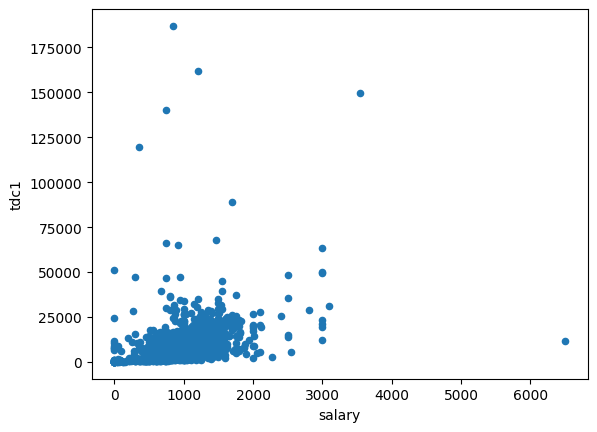

In [261]:
# Call the plot() method on the entire executive compensation DataFrame
eComp.plot.scatter(x= 'salary', y = 'tdc1')

You might want to inspect these values and decide if keeping them or removing them makes sense for the analyses you have in mind.

<Axes: xlabel='salary', ylabel='tdc1'>

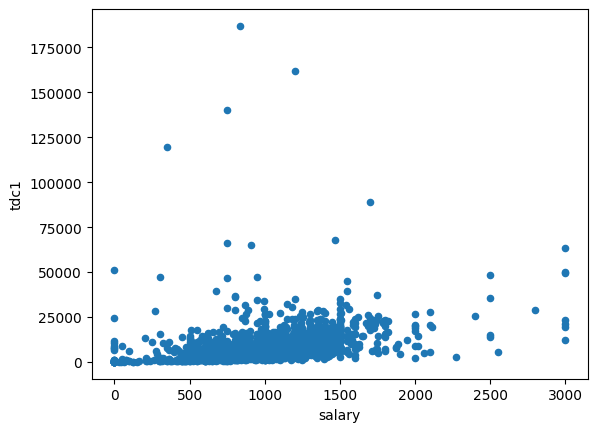

In [262]:
# remove the rows with the identified outliers with three largest values in the column we get the index
eComp_todrop = eComp["salary"].nlargest(3).index

# create a dataframe with the two rows dropped
eComp_dropped = eComp.drop(eComp_todrop)

# check the new df
eComp_dropped.plot.scatter(x= 'salary', y = 'tdc1')

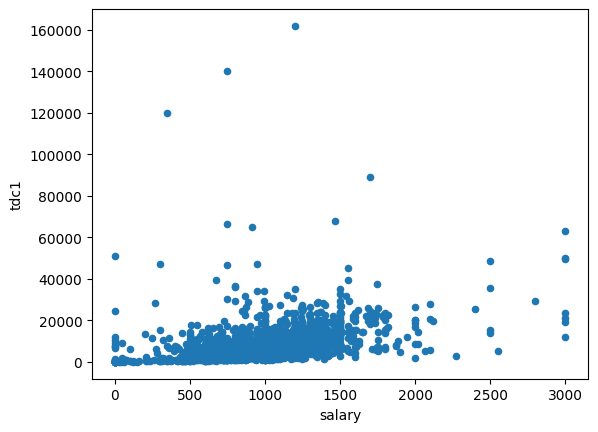

In [263]:
# do the same for the outlier in height
eComp_todrop = eComp_dropped["tdc1"].nlargest(1).index

# create a dataframe with the two rows dropped
eComp_cleaned = eComp_dropped.drop(eComp_todrop)

# check the new df
eComp_fig = eComp_cleaned.plot.scatter(x= 'salary', y = 'tdc1')

fig=eComp_fig.get_figure()

### 1.5.2(b) Same as above but for the cStat file

<Axes: xlabel='pi', ylabel='txt'>

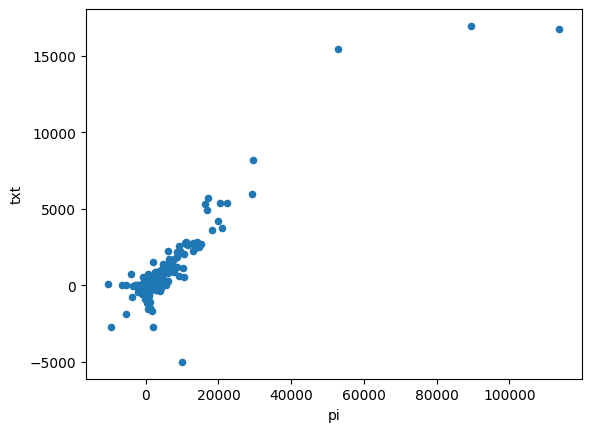

In [264]:
# Call the plot() method on the entire executive compensation DataFrame
cStat.plot.scatter(x= 'pi', y = 'txt')

<Axes: xlabel='pi', ylabel='txt'>

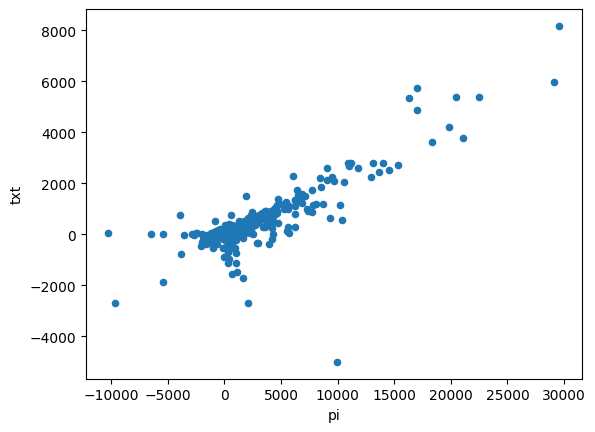

In [265]:
# remove the rows with the identified outliers with three largest values in the column we get the index
cStat_todrop = cStat["pi"].nlargest(3).index

# create a dataframe with the two rows dropped
cStat_dropped = cStat.drop(cStat_todrop)

# check the new df
cStat_dropped.plot.scatter(x= 'pi', y = 'txt')

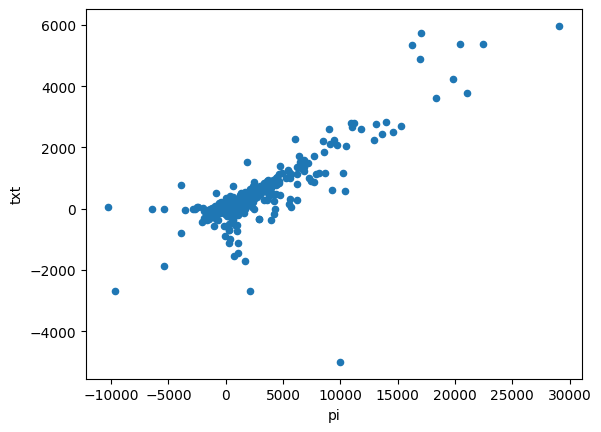

In [266]:
# do the same for the outlier in height
cStat_todrop = cStat_dropped["txt"].nlargest(1).index


# create a dataframe with the two rows dropped
cStat_cleaned = cStat_dropped.drop(cStat_todrop)


# check the new df
cStat_fig = cStat_cleaned.plot.scatter(x= 'pi', y = 'txt')
fig=cStat_fig.get_figure()


### 1.5.3. Saving a plot

Save eComp and cStat as high resolution and vectorized images

In [267]:
fig.savefig("eComp_cleaned.png", dpi=400)
fig.savefig("eComp_cleaned.svg", format='svg')


fig.savefig("cStat_cleaned.png", dpi=400)
fig.savefig("Stat_cleaned.svg", format='svg')


## 1.6. Data Wrangling

> Wrangling is often used to change into a format that is usable, includes merging, subsetting and transformation.



### 1.6.1. Replacing values in a column


In [268]:
# print the columns and the number of values and datatypes for reference
print(eComp.info())
print(cStat.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1763 entries, 0 to 9210
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ticker                   1763 non-null   object 
 1   gvkey                    1763 non-null   int64  
 2   co_per_rol               1763 non-null   int64  
 3   pceo                     1763 non-null   object 
 4   bonus                    1763 non-null   float64
 5   opt_exer_val             1762 non-null   float64
 6   opt_unex_unexer_est_val  1762 non-null   float64
 7   othcomp                  1763 non-null   float64
 8   salary                   1763 non-null   float64
 9   stock_awards             1763 non-null   float64
 10  stock_unvest_val         1762 non-null   float64
 11  tdc1                     1762 non-null   float64
 12  tdc2                     1762 non-null   float64
 13  total_sec                1763 non-null   float64
dtypes: float64(10), int64(2), obj

In [269]:
# Print the unique values contained in the "Cataloged" column using the
# DataFrame method unique()
cStat["state"].unique()

array(['IL', 'TX', 'AZ', 'MA', 'CT', 'FL', 'CA', 'PA', 'NC', 'AL', 'WA',
       'HI', 'NY', 'OH', 'GA', 'MN', 'WI', 'VT', 'AR', 'DE', 'RI', 'NJ',
       'CO', 'VA', 'NV', 'SD', 'MO', 'KY', 'KS', 'BC', 'IA', 'LA', 'MI',
       'TN', 'OK', 'IN', 'ON', 'QC', 'ID', 'MD', 'ND', 'MS', 'UT', 'OR',
       'NH', 'NS', 'NM', 'NE', 'SC', 'AB', 'ME', 'MT', 'NF', 'SK', 'MB',
       'DC', 'PR', 'NB', 'WV', 'AK'], dtype=object)

In [270]:
# Replace the values "Y" and "N" in the "Cataloged" column with "Yes" and "No"
cStat["state"] = cStat["state"].replace({
    'IL': 'Illinois',
    'TX': 'Texas',
    'AZ': 'Arizona',
    'MA': 'Massachusetts',
    'CT': 'Connecticut',
    'FL': 'Florida',
    'CA': 'California',
    'PA': 'Pennsylvania',
    'NC': 'North Carolina',
    'AL': 'Alabama',
    'WA': 'Washington',
    'HI': 'Hawaii',
    'NY': 'New York',
    'OH': 'Ohio',
    'GA': 'Georgia',
    'MN': 'Minnesota',
    'WI': 'Wisconsin',
    'VT': 'Vermont',
    'AR': 'Arkansas',
    'DE': 'Delaware',
    'RI': 'Rhode Island',
    'NJ': 'New Jersey',
    'CO': 'Colorado',
    'VA': 'Virginia',
    'NV': 'Nevada',
    'SD': 'South Dakota',
    'MO': 'Missouri',
    'KY': 'Kentucky',
    'KS': 'Kansas',
    'BC': 'British Columbia',
    'IA': 'Iowa',
    'LA': 'Louisiana',
    'MI': 'Michigan',
    'TN': 'Tennessee',
    'OK': 'Oklahoma',
    'IN': 'Indiana',
    'ON': 'Ontario',
    'QC': 'Quebec',
    'ID': 'Idaho',
    'MD': 'Maryland',
    'ND': 'North Dakota',
    'MS': 'Mississippi',
    'UT': 'Utah',
    'OR': 'Oregon',
    'NH': 'New Hampshire',
    'NS': 'Nova Scotia',
    'NM': 'New Mexico',
    'NE': 'Nebraska',
    'SC': 'South Carolina',
    'AB': 'Alberta',
    'ME': 'Maine',
    'MT': 'Montana',
    'NF': 'Newfoundland',
    'SK': 'Saskatchewan',
    'MB': 'Manitoba',
    'DC': 'District of Columbia',
    'PR': 'Puerto Rico',
    'NB': 'New Brunswick',
    'WV': 'West Virginia',
    'AK': 'Alaska'
})

# Print out the unique values of the "Cataloged" column
cStat["state"].unique()

array(['Illinois', 'Texas', 'Arizona', 'Massachusetts', 'Connecticut',
       'Florida', 'California', 'Pennsylvania', 'North Carolina',
       'Alabama', 'Washington', 'Hawaii', 'New York', 'Ohio', 'Georgia',
       'Minnesota', 'Wisconsin', 'Vermont', 'Arkansas', 'Delaware',
       'Rhode Island', 'New Jersey', 'Colorado', 'Virginia', 'Nevada',
       'South Dakota', 'Missouri', 'Kentucky', 'Kansas',
       'British Columbia', 'Iowa', 'Louisiana', 'Michigan', 'Tennessee',
       'Oklahoma', 'Indiana', 'Ontario', 'Quebec', 'Idaho', 'Maryland',
       'North Dakota', 'Mississippi', 'Utah', 'Oregon', 'New Hampshire',
       'Nova Scotia', 'New Mexico', 'Nebraska', 'South Carolina',
       'Alberta', 'Maine', 'Montana', 'Newfoundland', 'Saskatchewan',
       'Manitoba', 'District of Columbia', 'Puerto Rico', 'New Brunswick',
       'West Virginia', 'Alaska'], dtype=object)

### 1.6.2. Filtering rows in a DataFrame



In [271]:
# Filter the final DataFrame to only return rows of US companies
cStat[(cStat["state"] != "British Columbia") & (cStat["state"] != "Ontario") &
 (cStat["state"] != "Quebec") & (cStat["state"] != "Nova Scotia") & (cStat["state"] != "Alberta") &
  (cStat["state"] != "Newfoundland") & (cStat["state"] != "Saskatchewan") &
   (cStat["state"] != "Manitoba") & (cStat["state"] != "New Brunswick")]

,gvkey,tic,act,at,capx,che,cogs,ib,pi,revt,txc,txdb,txdc,txdi,txt,state
0,1004,AIR,1097.900,1833.100,29.500,81.800,1591.300,89.800,121.200,1990.600,33.600,33.600,-2.200,-2.200,31.400,Illinois
2,1050,CECO,281.437,600.291,8.384,55.448,369.206,12.911,21.525,544.845,7.147,8.838,-0.118,-0.123,7.024,Texas
5,1075,PNW,1926.967,24661.153,1889.934,4.955,3077.308,501.557,595.693,4695.991,24.126,2416.480,52.755,52.786,76.912,Arizona
8,1084,WDDD,0.265,0.265,0.000,0.245,0.000,0.082,0.082,0.000,0.000,0.000,0.000,0.000,0.000,Massachusetts
11,1104,ACU,92.024,149.241,4.674,5.546,114.223,17.793,22.734,191.501,4.346,0.899,0.594,0.595,4.941,Connecticut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13251,345980,LOGC,410.000,423.000,3.000,382.000,224.000,-317.000,-312.000,287.000,6.000,0.000,0.000,-1.000,5.000,California
13253,347007,IBRX,294.084,504.452,30.584,266.462,343.474,-583.196,-583.892,0.622,-0.026,0.148,0.000,-0.014,-0.040,California
13258,349337,MDAI,9.902,10.692,0.000,4.790,10.167,-20.854,-20.843,18.056,0.011,0.000,0.000,0.000,0.011,Texas
13260,349972,INDP,13.995,14.924,0.000,13.362,0.000,-15.423,-15.423,0.000,0.000,0.000,0.000,0.000,0.000,New York


### 1.6.3. Creating a new column using an expression


In [272]:
# Create a new DataFrame column consisting with column
eComp["Stock as % of total compensation"] = eComp["stock_awards"] / eComp["tdc1"]
eComp["Options as % of total compensation"] = eComp["opt_exer_val"] / eComp["tdc1"]
print(eComp.head())

cStat["Total Income Taxes as % of pretax income"] = cStat["txt"] / cStat["pi"]
cStat["Total Income Deferred Taxes as % of pretax income"] = cStat["txdc"] / cStat["pi"]
cStat["Total Income Deferred Taxes as % of total assets"] = cStat["txdc"] / cStat["at"]
print(cStat.head())


   ticker  gvkey  co_per_rol pceo   bonus  opt_exer_val  \
0     AIR   1004       51547  CEO     0.0      5799.275   
6     AAL   1045       49258  CEO  2750.0         0.000   
10    PNW   1075       61549  CEO     0.0         0.000   
15    PRG   1076       50433  CEO     0.0         0.000   
20    ABT   1078       59834  CEO     0.0         0.000   

    opt_unex_unexer_est_val  othcomp  salary  stock_awards  stock_unvest_val  \
0                  1684.328  482.257  1050.0      3272.152         13379.485   
6                     0.000  110.002  1300.0     19500.000          9751.594   
10                    0.000   34.831  1125.0      5028.405          3237.829   
15                  788.999   40.319   975.0      4675.007         10248.365   
20                    0.000  283.392  1500.0      7436.600             0.000   

         tdc1       tdc2  total_sec  Stock as % of total compensation  \
0    7865.228  12846.484   7865.450                          0.416028   
6   11938.162  119

## 1.7. Data Merging

### 1.7.1. Saving cleaned and wrangled files

In [274]:
eComp.to_csv('eComp_cleaned.csv', index=False)
cStat.to_csv('cStat_cleaned.csv', index=False)


### 1.7.2. Load the multiple datasets


Use this link for the cleaned cStat file: https://raw.githubusercontent.com/causeyca21/CSC442Group/refs/heads/main/cStat_cleaned.csv

Use this link for the cleaned eComp file: https://raw.githubusercontent.com/causeyca21/CSC442Group/refs/heads/main/eComp_cleaned.csv



### 1.7.2.2 Broad Merge

We will be using broad merge based on the common column *gvkey*.

In [276]:
# Create a new DataFrame from a "left" join of the full artworks DataFrame
# and the artists DataFrame base on the shared column "ConstituentID"
merged_data = cStat.merge(eComp, on="gvkey", how="inner")
merged_data.to_csv('merged_data.csv', index=False)
merged_data

,gvkey,tic,act,at,capx,che,cogs,ib,pi,revt,...,opt_unex_unexer_est_val,othcomp,salary,stock_awards,stock_unvest_val,tdc1,tdc2,total_sec,Stock as % of total compensation,Options as % of total compensation
0,1004,AIR,1097.900,1833.100,29.500,81.800,1591.300,89.800,121.200,1990.600,...,1684.328,482.257,1050.000,3272.152,13379.485,7865.228,12846.484,7865.450,0.416028,0.737331
1,1075,PNW,1926.967,24661.153,1889.934,4.955,3077.308,501.557,595.693,4695.991,...,0.000,34.831,1125.000,5028.405,3237.829,3753.703,3753.703,9322.192,1.339585,0.000000
2,1161,AMD,16768.000,67885.000,546.000,5773.000,10833.000,854.000,508.000,22680.000,...,0.000,28.711,1200.000,21848.258,9531.088,8500.023,123065.368,30348.281,2.570376,14.165121
3,1209,APD,5200.500,32002.500,4626.400,1949.200,7474.700,2292.800,2882.400,12600.000,...,0.000,401.795,1350.000,17074.629,18076.385,9994.108,9994.108,22078.099,1.708470,0.000000
4,1230,ALK,2705.000,14613.000,1494.000,1791.000,8106.000,235.000,323.000,10426.000,...,0.000,386.446,637.692,7969.932,0.000,8570.214,8570.214,10313.054,0.929957,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,264193,SNDR,1110.900,4557.200,807.600,159.600,4668.400,238.500,306.100,5498.900,...,216.553,149.056,941.667,4703.533,268.218,1090.723,1090.723,5794.256,4.312308,0.000000
1148,264416,UCTT,893.200,1867.700,75.800,307.000,1411.100,-31.100,-11.300,1734.500,...,0.000,11.997,736.538,3507.146,2986.943,5043.765,5043.765,5043.765,0.695343,0.000000
1149,287462,FF,290.546,367.081,6.022,220.189,316.888,37.382,37.383,368.250,...,0.000,51.000,442.000,0.000,0.000,699.000,699.000,699.000,0.000000,0.000000
1150,317264,LPG,236.299,1708.914,68.785,148.797,98.309,172.444,172.444,392.151,...,0.000,9.900,650.000,2381.285,3095.991,1914.900,1914.900,4296.185,1.243556,0.000000


In [277]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 34 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   gvkey                                              1152 non-null   int64  
 1   tic                                                1152 non-null   object 
 2   act                                                1152 non-null   float64
 3   at                                                 1152 non-null   float64
 4   capx                                               1152 non-null   float64
 5   che                                                1152 non-null   float64
 6   cogs                                               1152 non-null   float64
 7   ib                                                 1152 non-null   float64
 8   pi                                                 1152 non-null   float64
 9   revt    

# Credits

This workshop was created by Aditi Mallavarapu, Claire Cahoon and Walt Gurley, adapted from previous workshop materials by Scott Bailey and Simon Wiles, of Stanford Libraries.